<a href="https://colab.research.google.com/github/ABDULRAFAY757/ABDULRAFAY757/blob/main/Decision%20tree%20on%20diabetes%20datatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree, metrics, model_selection, preprocessing
from google.colab import files 
import io
data = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
col_names = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(io.StringIO(data['diabetes.csv'].decode('utf-8')), header=None, names=col_names) 
pima.iloc[1:]
pima.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,148,72,35,0,33.6,0.627,50,1
2,85,66,29,0,26.6,0.351,31,0
3,183,64,0,0,23.3,0.672,32,1
4,89,66,23,94,28.1,0.167,21,0


In [ ]:
pima = pima.drop(labels=0, axis = 0)

In [ ]:
pima.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,148,72,35,0,33.6,0.627,50,1
2,85,66,29,0,26.6,0.351,31,0
3,183,64,0,0,23.3,0.672,32,1
4,89,66,23,94,28.1,0.167,21,0
5,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] # Features (independent variable)
y = pima.label # Target variable (dependent variable)
# Split dataset into training set and test setfrom sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? print("Accuracy:",metrics.accuracy_score (y_test, y_pred))
print("Accuracy:",metrics.accuracy_score (y_test, y_pred))

Accuracy: 0.6493506493506493


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

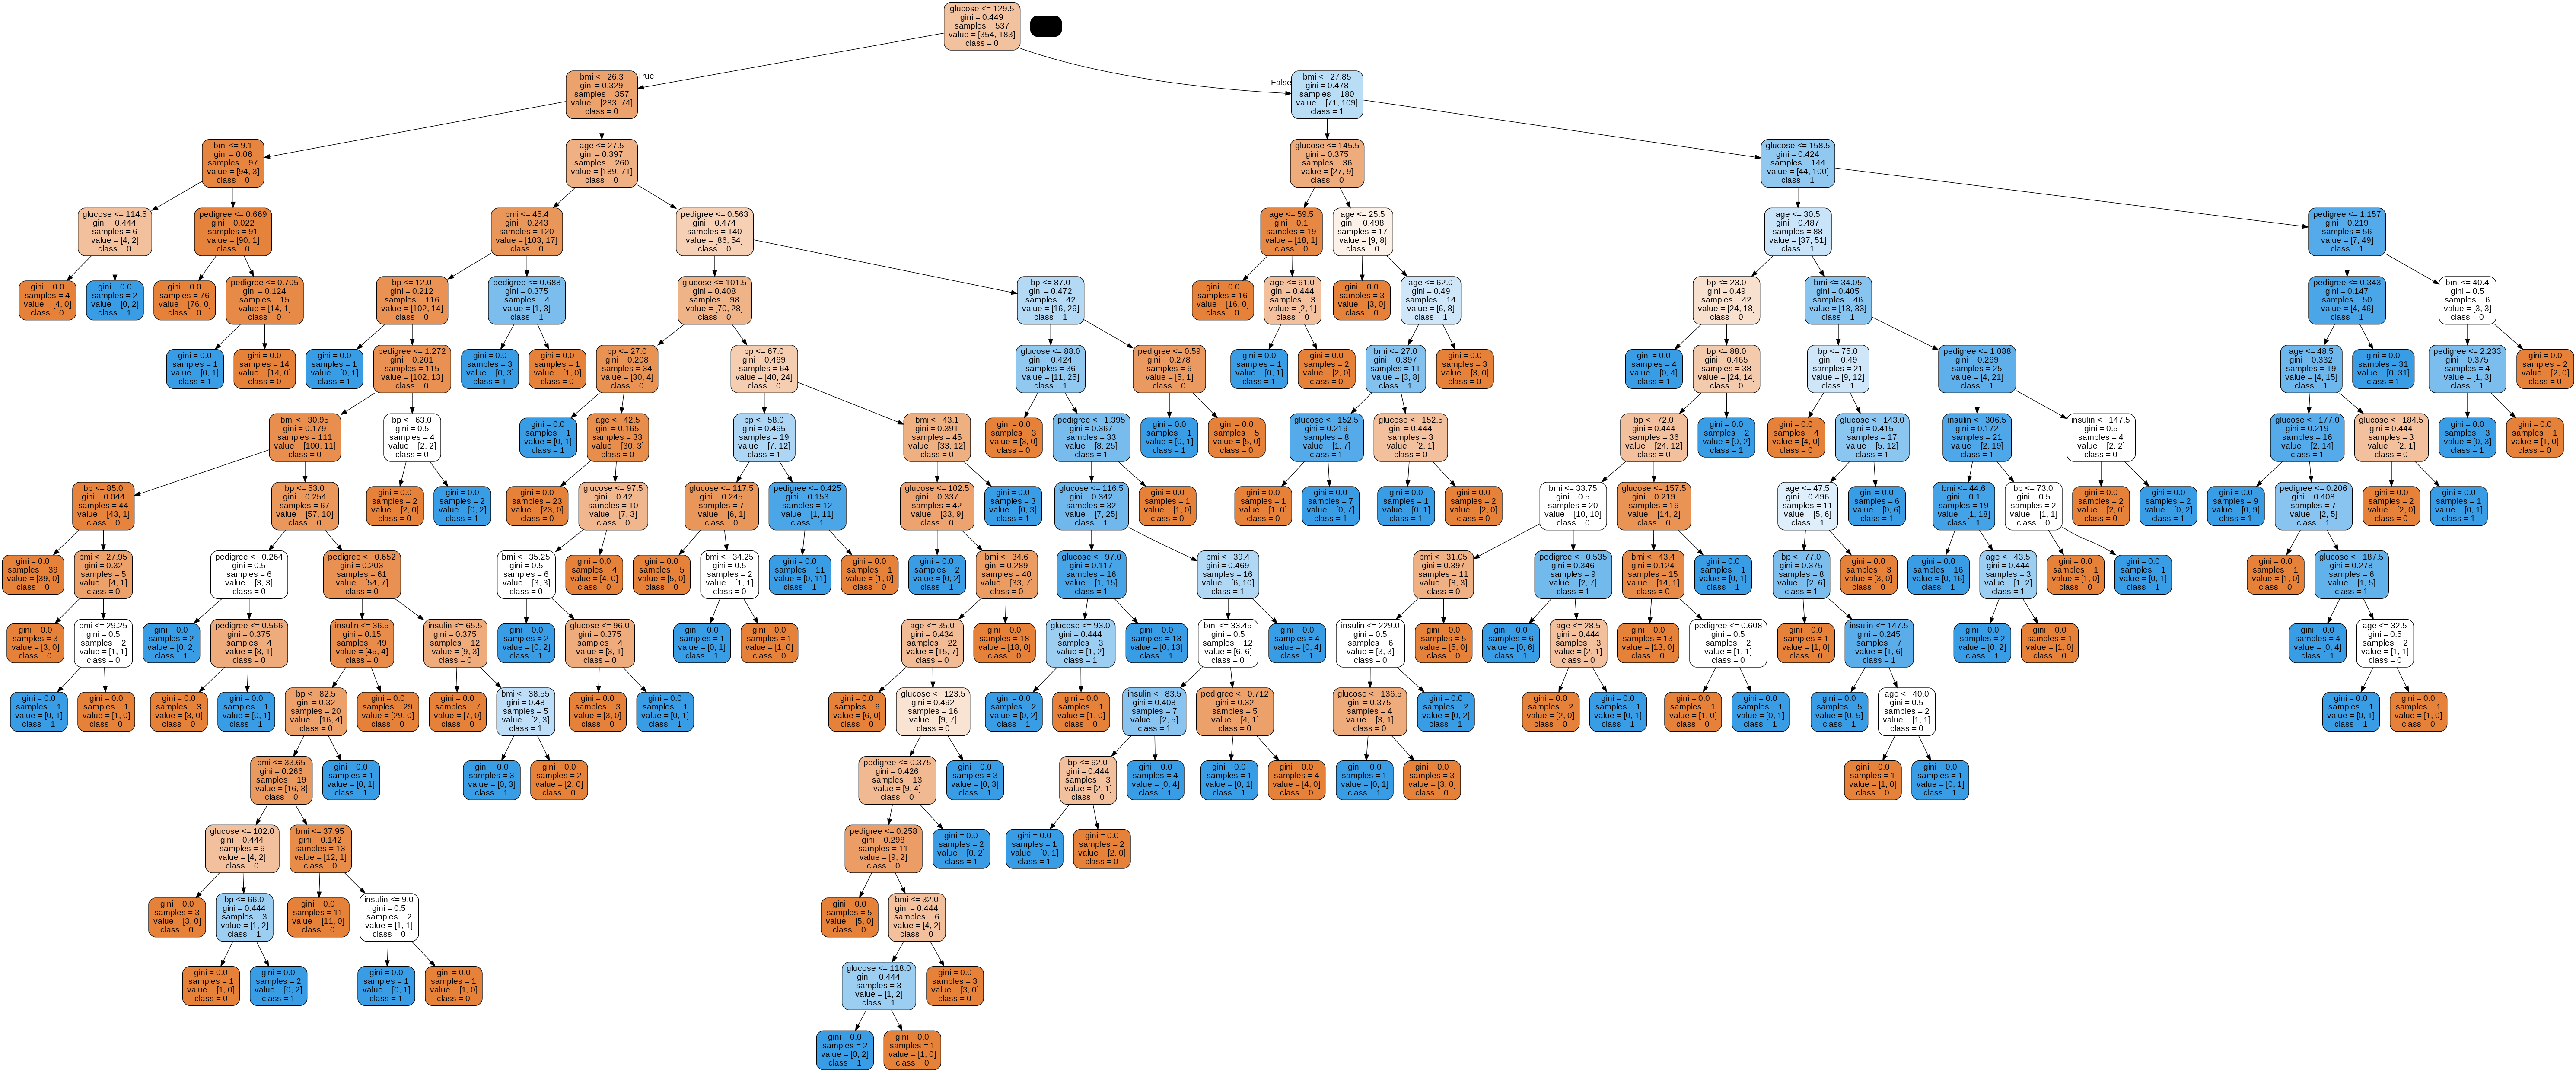

In [ ]:
import pydot

dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True, rounded=True,
                                feature_names = feature_cols,class_names=['0','1'])
graph= pydot.graph_from_dot_data(dot_data)
display(Image(graph[0].create_png()))


In [ ]:
 # Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [ ]:
import io
from io import StringIO
import string

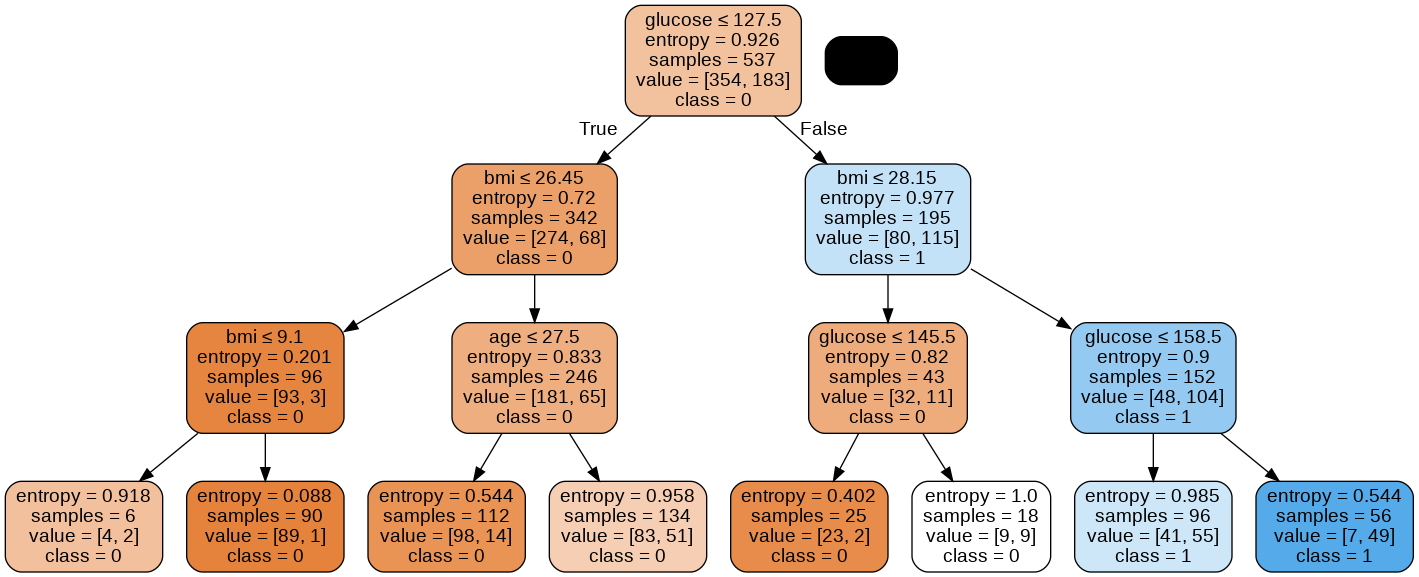

In [ ]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())